# ANN Model

In [38]:
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
path = './archive'

kc_data = pd.read_csv(path + '/kc_preprocessed.csv')
kc_data = kc_data.drop(['Unnamed: 0'], axis = 1)


In [3]:
columns = kc_data.columns
kc_data_norm=(kc_data-kc_data.mean())/kc_data.std()
y_mean = kc_data['price'].mean()
y_sigma = kc_data['price'].std()
def y_unnorm(y_norm):
    y = y_norm * y_sigma + y_mean
    return y
print('y_mean: '+str(y_mean))
print('y_sigma: '+str(y_sigma))

y_mean: 540083.5187858597
y_sigma: 367135.0612686228


In [4]:
target = kc_data_norm['price']
data = kc_data_norm.drop(['price'], axis = 1)

In [5]:
x_train, x_final_test, y_train, y_final_test = train_test_split(data, target, test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25)

In [9]:
#Base Structure

NN_model = Sequential()
NN_model.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100,activation='sigmoid'))

NN_model.add(Dense(50, activation='sigmoid'))

NN_model.add(Dense(50, activation='sigmoid'))



# The Output Layer :
NN_model.add(Dense(1,))

# Compile the network :
opt = SGD(learning_rate=0.001, momentum=1)

NN_model.compile(loss ='mean_squared_error', optimizer='RMSprop',)
NN_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 17)                323       
_________________________________________________________________
dense_100 (Dense)            (None, 100)               1800      
_________________________________________________________________
dense_101 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_102 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 51        
Total params: 9,774
Trainable params: 9,774
Non-trainable params: 0
_________________________________________________________________


training model:
training model:
training model:
training model:
training model:


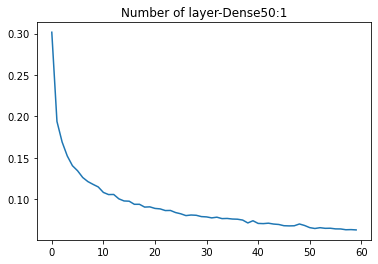

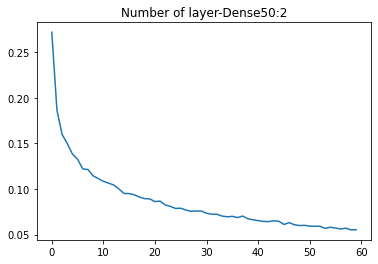

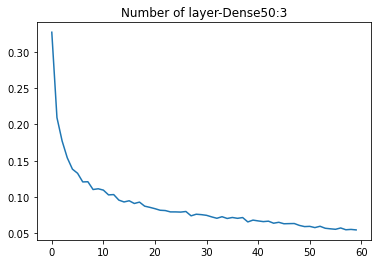

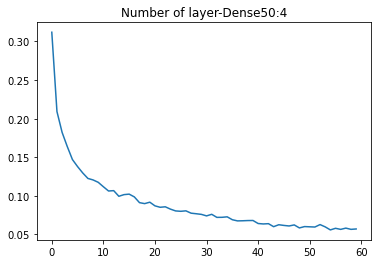

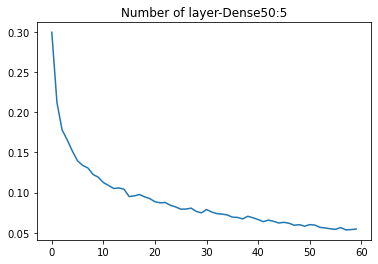

In [10]:
#hidden layer examination
Models= {}
Models['layer-Dense50']={}

for i in range(1,6):
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    for j in range(i):
        NN.add(Dense(50, activation='relu'))
        
    NN.add(Dense(1,))
    NN.compile(loss ='mean_squared_error', optimizer='RMSprop',)

    Models['layer-Dense50'][i] = NN
    
        
counter = 0
for i, model in Models['layer-Dense50'].items():
    print('training model:')
    history = model.fit(x = x_train, y = y_train, epochs=60, verbose = 0)
    plt.figure()
    plt.plot(history.history['loss'],)
    plt.title('Number of layer-Dense50:{}'.format(i))
    
    

training model:
training model:
training model:
training model:
training model:
training model:


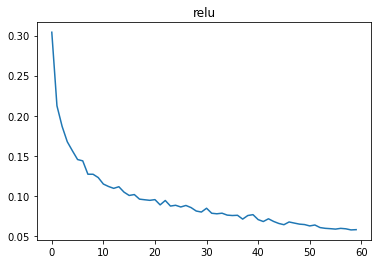

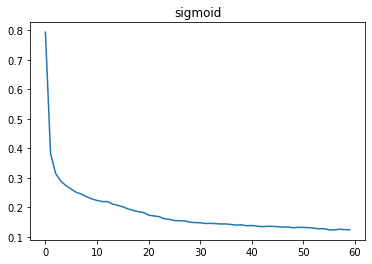

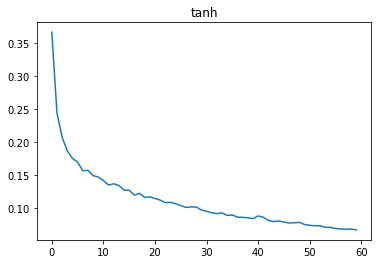

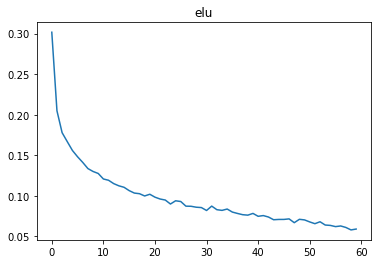

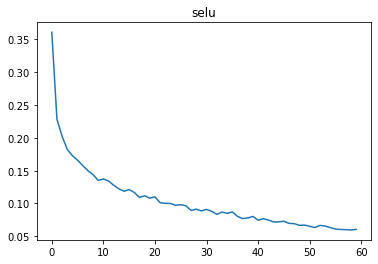

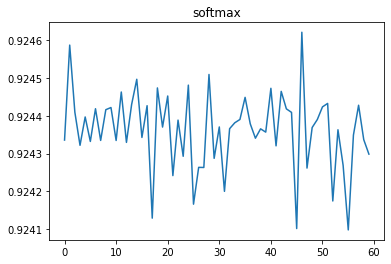

In [11]:
# activation function examination
Models['activation'] = {}

activation_func = ['relu','sigmoid','tanh','elu','selu','softmax']
for func in activation_func:
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation=func))
    NN.add(Dense(100,activation=func))
    NN.add(Dense(50, activation=func))
    for j in range(5):
        NN.add(Dense(50, activation=func))
        
    NN.add(Dense(1,))
    NN.compile(loss ='mean_squared_error', optimizer='RMSprop',)

    Models['activation'][func]=NN
    
counter = 0
for i, model in Models['activation'].items():
    print('training model:')
    
    history = model.fit(x = x_train, y = y_train, epochs=60, verbose = 0)
    plt.figure()
    plt.title(activation_func[counter])
    plt.plot(history.history['loss'],)
    counter += 1
    

training model:
training model:
training model:
training model:
training model:
training model:
training model:
training model:


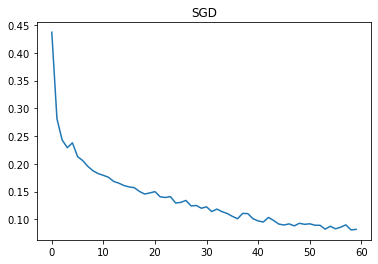

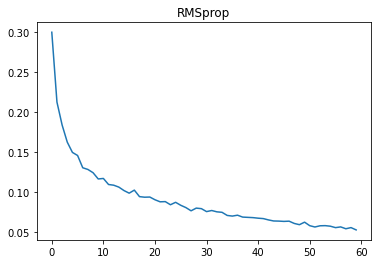

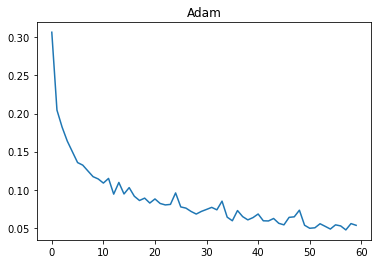

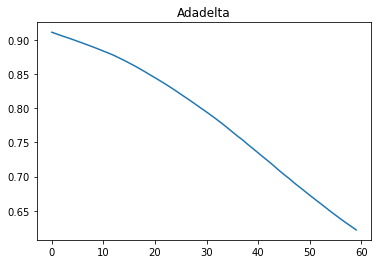

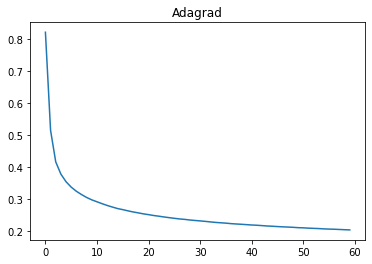

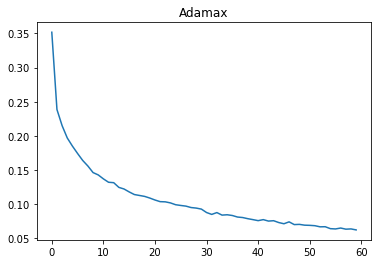

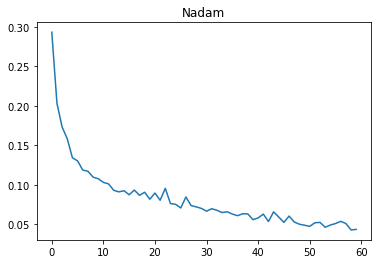

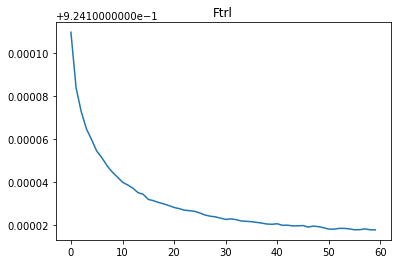

In [12]:
# optimizer examination
Models['optimizer']={}

optimizers = ['SGD','RMSprop','Adam','Adadelta','Adagrad','Adamax','Nadam','Ftrl']
for opt in optimizers:
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    NN.add(Dense(50, activation='relu'))
    for j in range(5):
        NN.add(Dense(50, activation='relu'))
        
    NN.add(Dense(1,))
    NN.compile(loss ='mean_squared_error', optimizer=opt,)

    Models['optimizer'][opt]=NN
    
counter = 0
for i, model in Models['optimizer'].items():
    print('training model:')
    
    history = model.fit(x = x_train, y = y_train, epochs=60, verbose = 0)
    plt.figure()
    plt.title(optimizers[counter])
    plt.plot(history.history['loss'],)
    counter += 1

training model:
training model:
training model:
training model:
training model:
training model:
training model:


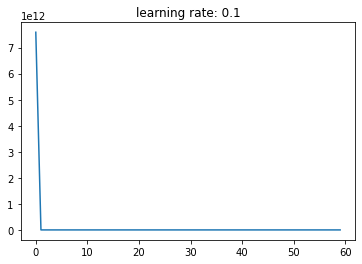

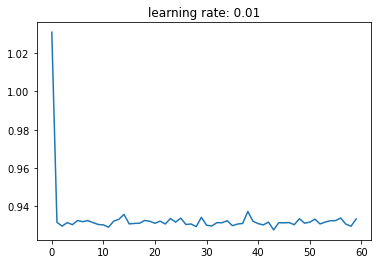

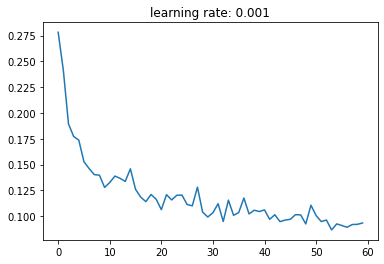

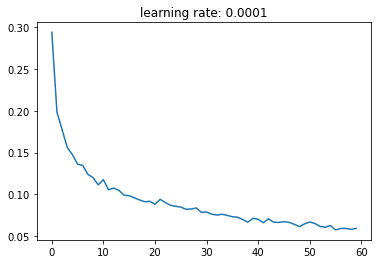

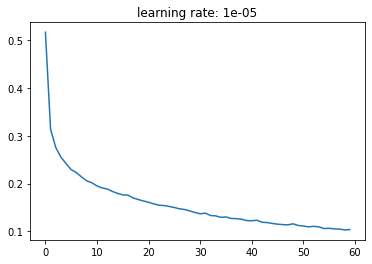

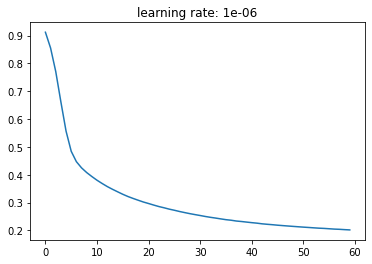

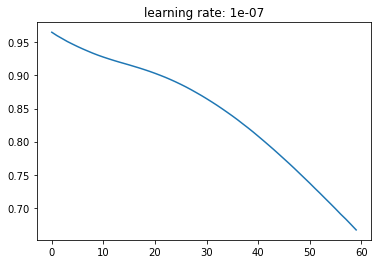

In [13]:
# learning rate examination
Models['learning_rate'] = {}

learning_rates = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
for lr in learning_rates:
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    NN.add(Dense(50, activation='relu'))
    for j in range(5):
        NN.add(Dense(50, activation='relu'))
    opt = RMSprop(learning_rate= lr, momentum=0.9)    
    NN.add(Dense(1,))
    NN.compile(loss ='mean_squared_error', optimizer=opt,)

    Models['learning_rate'][lr]=(NN)
    
counter = 0
for i, model in Models['learning_rate'].items():
    print('training model:')
    
    history = model.fit(x = x_train, y = y_train, epochs=60, verbose = 0)
    plt.figure()
    plt.title('learning rate: {}'.format(learning_rates[counter]))
    plt.plot(history.history['loss'],)
    counter += 1

training model:
training model:
training model:
training model:
training model:
training model:
training model:


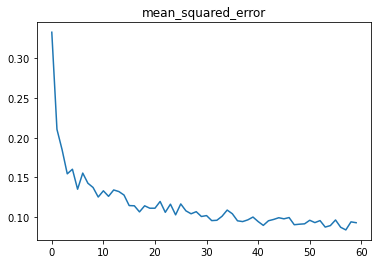

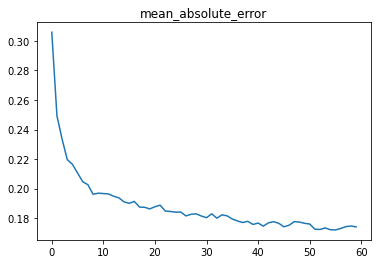

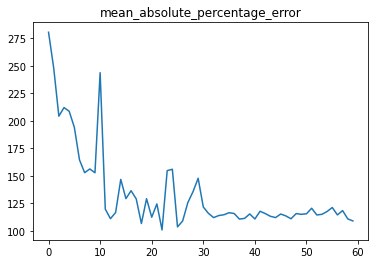

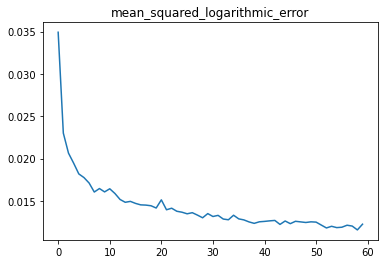

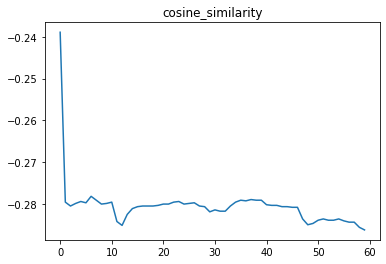

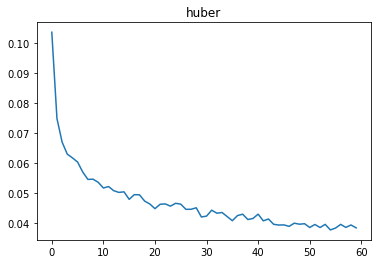

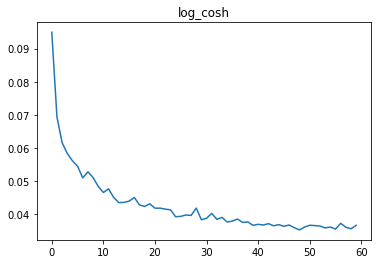

In [14]:
# loss function examination

Models['loss_function'] = {}

loss_functions = ['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error',
                  'mean_squared_logarithmic_error','cosine_similarity','huber','log_cosh']

for func in loss_functions:
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='relu'))
    NN.add(Dense(100,activation='relu'))
    NN.add(Dense(50, activation='relu'))
    for j in range(5):
        NN.add(Dense(50, activation='relu'))
    opt = RMSprop(learning_rate= 0.001, momentum=0.9)    
    NN.add(Dense(1,))
    NN.compile(loss = func, optimizer=opt,)

    Models['loss_function'][func]=NN
    
counter = 0
for i, model in Models['loss_function'].items():
    print('training model:')
    
    history = model.fit(x = x_train, y = y_train, epochs=60, verbose = 0)
    plt.figure()
    plt.title(loss_functions[counter])
    plt.plot(history.history['loss'],)
    counter += 1

Epoch 1/150
406/406 [==============================] - 1s 552us/step - loss: 0.4854
Epoch 2/150
406/406 [==============================] - 0s 485us/step - loss: 0.2446
Epoch 3/150
406/406 [==============================] - 0s 486us/step - loss: 0.2042
Epoch 4/150
406/406 [==============================] - 0s 543us/step - loss: 0.1851
Epoch 5/150
406/406 [==============================] - 0s 539us/step - loss: 0.1725
Epoch 6/150
406/406 [==============================] - 0s 525us/step - loss: 0.1639
Epoch 7/150
406/406 [==============================] - 0s 543us/step - loss: 0.1556
Epoch 8/150
406/406 [==============================] - 0s 531us/step - loss: 0.1511
Epoch 9/150
406/406 [==============================] - 0s 548us/step - loss: 0.1452
Epoch 10/150
406/406 [==============================] - 0s 548us/step - loss: 0.1408
Epoch 11/150
406/406 [==============================] - 0s 529us/step - loss: 0.1366
Epoch 12/150
406/406 [==============================] - 0s 525us/step - lo

406/406 [==============================] - 0s 528us/step - loss: 0.0842
Epoch 98/150
406/406 [==============================] - 0s 517us/step - loss: 0.0843
Epoch 99/150
406/406 [==============================] - 0s 540us/step - loss: 0.0844
Epoch 100/150
406/406 [==============================] - 0s 537us/step - loss: 0.0849
Epoch 101/150
406/406 [==============================] - 0s 536us/step - loss: 0.0834
Epoch 102/150
406/406 [==============================] - 0s 539us/step - loss: 0.0838
Epoch 103/150
406/406 [==============================] - 0s 539us/step - loss: 0.0824
Epoch 104/150
406/406 [==============================] - 0s 543us/step - loss: 0.0829
Epoch 105/150
406/406 [==============================] - 0s 542us/step - loss: 0.0819
Epoch 106/150
406/406 [==============================] - 0s 540us/step - loss: 0.0826
Epoch 107/150
406/406 [==============================] - 0s 542us/step - loss: 0.0812
Epoch 108/150
406/406 [==============================] - 0s 543us/step

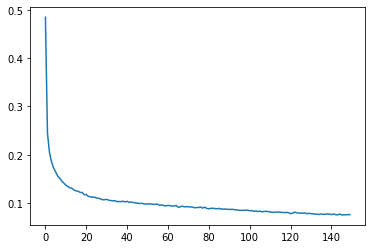

In [15]:
history = NN_model.fit(x = x_train, y = y_train, epochs=150,)

plt.plot(history.history['loss'])

In [16]:
loss = NN_model.evaluate(x_test, y_test)


136/136 [==============================] - 0s 390us/step - loss: 0.1303


In [17]:
print(NN_model.predict(x_test))

[[ 0.7162762 ]
 [ 0.36186412]
 [-0.7473048 ]
 ...
 [ 0.10575387]
 [-0.3933204 ]
 [ 0.54295546]]


In [18]:
y = np.array(y_test).reshape(-1,1)

In [19]:
def metrics(y_predict, y_true):  #given predicted and true values, return dictionary of R2, RMSE, RMSE/mean, average abs % error
    metrics={}
    residual = y_predict - y_true
    average = np.average(y_true)
    abs_percent_error = np.absolute(np.divide(residual,y_true))*100
    metrics['R2'] = 1 - (np.sum(residual**2)/len(residual))/np.var(y_true)
    metrics['RMSE']= (np.sum(residual**2)/len(residual))**0.5
    metrics['RMSE/mean'] = metrics['RMSE'] / average
    metrics['average absolute % error'] = np.average(abs_percent_error)
    metrics['median absolute % error'] = np.median(abs_percent_error)
    return metrics

def metrics_unnorm(y_predict, y_true): #same to metrics() except un-normalizing y before calculation
    m = metrics(y_unnorm(y_predict), y_unnorm(y_true))
    return m

def compare_model(Models, x_test, y_test, style='norm'): #given nested dictionary of models in the form Models[factor][parameter], print and store metrics
    results={}
    for factor, model_para in Models.items():
        results[factor]={}
        print(str(factor)+'------------------------')
        for parameter, model in model_para.items():
            if style=='norm':
                m=metrics(np.squeeze(model.predict(x_test)), y_test)
            if style=='unnorm':
                m=metrics_unnorm(np.squeeze(model.predict(x_test)), y_test)
            results[factor][parameter] = m
            R2= "{:.2f}".format(m['R2']*100)
            RMSE_div_mean = "{:.2f}".format(m['RMSE/mean']*100)
            avg_abs_percent_error = "{:.2f}".format(m['average absolute % error'])
            print('['+str(parameter)+'] R2: '+str(R2)+'%, RMSE/mean: '+str(RMSE_div_mean)+'%, avg abs % error: '+str(avg_abs_percent_error)+'%')
    return results

compare_results = compare_model(Models, x_test, y_test)

layer-Dense50------------------------
[1] R2: 88.51%, RMSE/mean: 2477.81%, avg abs % error: 297.15%
[2] R2: 88.63%, RMSE/mean: 2464.61%, avg abs % error: 345.59%
[3] R2: 86.45%, RMSE/mean: 2690.83%, avg abs % error: 401.46%
[4] R2: 87.76%, RMSE/mean: 2557.51%, avg abs % error: 245.02%
[5] R2: 85.68%, RMSE/mean: 2766.51%, avg abs % error: 315.33%
activation------------------------
[relu] R2: 87.73%, RMSE/mean: 2560.89%, avg abs % error: 298.93%
[sigmoid] R2: 85.36%, RMSE/mean: 2796.81%, avg abs % error: 268.64%
[tanh] R2: 84.22%, RMSE/mean: 2903.82%, avg abs % error: 286.88%
[elu] R2: 86.71%, RMSE/mean: 2664.93%, avg abs % error: 271.72%
[selu] R2: 85.01%, RMSE/mean: 2830.85%, avg abs % error: 262.11%
[softmax] R2: -0.10%, RMSE/mean: 7314.27%, avg abs % error: 121.94%
optimizer------------------------
[SGD] R2: 87.58%, RMSE/mean: 2576.25%, avg abs % error: 375.10%
[RMSprop] R2: 86.14%, RMSE/mean: 2721.99%, avg abs % error: 280.57%
[Adam] R2: 87.24%, RMSE/mean: 2611.33%, avg abs % error:

The above RMSE/mean and average absolute % error all look very terrible, all over 100%, because the mean of test data is nearly zero after normalization! 

Let's do an un-normalized version:


In [20]:
metrics_unnorm(np.squeeze(NN_model.predict(x_test)) , y_test)

{'R2': 0.8882650879692677,
 'RMSE': 132499.71629584307,
 'RMSE/mean': 0.24289342735422928,
 'average absolute % error': 14.577723148373696}

In [21]:
compare_results = compare_model(Models, x_test, y_test, style='unnorm')

layer-Dense50------------------------
[1] R2: 88.51%, RMSE/mean: 24.63%, avg abs % error: 13.67%
[2] R2: 88.63%, RMSE/mean: 24.50%, avg abs % error: 14.48%
[3] R2: 86.45%, RMSE/mean: 26.75%, avg abs % error: 16.40%
[4] R2: 87.76%, RMSE/mean: 25.42%, avg abs % error: 13.50%
[5] R2: 85.68%, RMSE/mean: 27.50%, avg abs % error: 13.49%
activation------------------------
[relu] R2: 87.73%, RMSE/mean: 25.45%, avg abs % error: 15.53%
[sigmoid] R2: 85.36%, RMSE/mean: 27.80%, avg abs % error: 15.41%
[tanh] R2: 84.22%, RMSE/mean: 28.86%, avg abs % error: 14.84%
[elu] R2: 86.71%, RMSE/mean: 26.49%, avg abs % error: 13.20%
[selu] R2: 85.01%, RMSE/mean: 28.14%, avg abs % error: 19.19%
[softmax] R2: -0.10%, RMSE/mean: 72.70%, avg abs % error: 53.02%
optimizer------------------------
[SGD] R2: 87.58%, RMSE/mean: 25.61%, avg abs % error: 15.94%
[RMSprop] R2: 86.14%, RMSE/mean: 27.06%, avg abs % error: 16.55%
[Adam] R2: 87.24%, RMSE/mean: 25.96%, avg abs % error: 13.48%
[Adadelta] R2: 32.60%, RMSE/mean:

# Summary of preliminary model comparisons



For practical purpose, absolute percentage error would be the major concern for buyers and sellers for different price levels. Hence, we will evaluate model performance mainly based on this metrics - average absolute percentage error.






### Number of Layers

Adding more layers of Dense(50) only generates similar or worse results. So for simplicity, we will choose to focus our work on fewer layers. The model with 1 added layer of Dense(50) is 17/17/100/50/1, with 3 hidden layers, which would be our base model for tunning in the next stage.

### Activation Function

Exponential Linear Unit (elu) is the best performer. It is a function that tend to converge cost to zero faster and produce more accurate results. It is similar to RELU, except that it can produce negative values.

### Optimizer

Adam, followed by Adam-like optimizers, performs the best.

### Learning Rate

Laerning rate of 0.0001 produces the best result.

### Loss Function

One intetesting result is that, measured by average absolute percentage error, the loss function of mean_absolute_percentage_error perfoms the worst instead of the best! One major reason is standard normalization would make measure based on percentage of predicted values very unstable, as the mean of predicted value is zero, the measure could approach infinity. The squaring of error may become smaller for error values below 1, so mean_squared_error may not be good choice. 

Let's choose the best performer from above results - the mean_absolute_error.


# Further tuning with regularization

From above, we will focus on neural network with structure 17/17/100/50/1, elu as activation function, Adam as optimizer, learning rate at 0.0001, loss function "mean_absolute_error".

Note that previously we have not yet tuned with regularization, such as dropout, L2 regularization. One useful technique is to compare testing accuracy with training accuracy to detect under-fitting or over-fitting. 

In [37]:
#Base Structure v2

NN_model2 = Sequential()
NN_model2.add(Dense(17,input_dim = x_train.shape[1], activation='elu'))
NN_model2.add(Dense(100,activation='elu'))
NN_model2.add(Dense(50, activation='elu'))
NN_model2.add(Dense(1,))

opt = Adam(learning_rate = 0.0001)  
# Compile the network :
NN_model2.compile(loss ='mean_absolute_error', optimizer=opt,)
NN_model2.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_402 (Dense)            (None, 17)                323       
_________________________________________________________________
dense_403 (Dense)            (None, 100)               1800      
_________________________________________________________________
dense_404 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_405 (Dense)            (None, 1)                 51        
Total params: 7,224
Trainable params: 7,224
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
406/406 [==============================] - 0s 552us/step - loss: 0.1708
Epoch 2/200
406/406 [==============================] - 0s 592us/step - loss: 0.1712
Epoch 3/200
406/406 [==============================] - 0s 542us/step - loss: 0.1711
Epoch 4/200
406/406 [==============================] - 0s 539us/step - loss: 0.1706
Epoch 5/200
406/406 [==============================] - 0s 550us/step - loss: 0.1711
Epoch 6/200
406/406 [==============================] - 0s 517us/step - loss: 0.1711
Epoch 7/200
406/406 [==============================] - 0s 542us/step - loss: 0.1710
Epoch 8/200
406/406 [==============================] - 0s 548us/step - loss: 0.1710
Epoch 9/200
406/406 [==============================] - 0s 538us/step - loss: 0.1706
Epoch 10/200
406/406 [==============================] - 0s 536us/step - loss: 0.1711
Epoch 11/200
406/406 [==============================] - 0s 528us/step - loss: 0.1707
Epoch 12/200
406/406 [==============================] - 0s 496us/step - lo

406/406 [==============================] - 0s 556us/step - loss: 0.1679
Epoch 98/200
406/406 [==============================] - 0s 574us/step - loss: 0.1679
Epoch 99/200
406/406 [==============================] - 0s 570us/step - loss: 0.1672
Epoch 100/200
406/406 [==============================] - 0s 580us/step - loss: 0.1671
Epoch 101/200
406/406 [==============================] - 0s 557us/step - loss: 0.1675
Epoch 102/200
406/406 [==============================] - 0s 542us/step - loss: 0.1672
Epoch 103/200
406/406 [==============================] - 0s 543us/step - loss: 0.1673
Epoch 104/200
406/406 [==============================] - 0s 540us/step - loss: 0.1671
Epoch 105/200
406/406 [==============================] - 0s 531us/step - loss: 0.1667
Epoch 106/200
406/406 [==============================] - 0s 550us/step - loss: 0.1670
Epoch 107/200
406/406 [==============================] - 0s 559us/step - loss: 0.1668
Epoch 108/200
406/406 [==============================] - 0s 559us/step

406/406 [==============================] - 0s 514us/step - loss: 0.1648
Epoch 193/200
406/406 [==============================] - 0s 506us/step - loss: 0.1645
Epoch 194/200
406/406 [==============================] - 0s 506us/step - loss: 0.1638
Epoch 195/200
406/406 [==============================] - 0s 508us/step - loss: 0.1639
Epoch 196/200
406/406 [==============================] - 0s 504us/step - loss: 0.1644
Epoch 197/200
406/406 [==============================] - 0s 502us/step - loss: 0.1640
Epoch 198/200
406/406 [==============================] - 0s 503us/step - loss: 0.1642
Epoch 199/200
406/406 [==============================] - 0s 502us/step - loss: 0.1635
Epoch 200/200
406/406 [==============================] - 0s 505us/step - loss: 0.1636


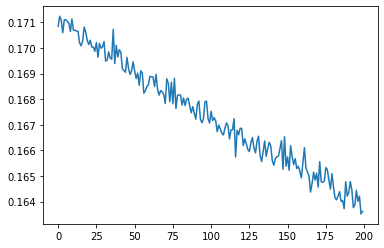

In [33]:
history = NN_model2.fit(x = x_train, y = y_train, epochs=200,)

plt.plot(history.history['loss'])

In [34]:
metrics_unnorm(np.squeeze(NN_model2.predict(x_train)) , y_train)

{'R2': 0.9150037273690476,
 'RMSE': 102893.62075553637,
 'RMSE/mean': 0.1920174867998606,
 'average absolute % error': 11.59537876597654}

In [35]:
metrics_unnorm(np.squeeze(NN_model2.predict(x_test)) , y_test)

{'R2': 0.8886493570355943,
 'RMSE': 132271.67927113103,
 'RMSE/mean': 0.2424753985761729,
 'average absolute % error': 12.7124393500427}

The testing error 12.7% is slightly higher than training error 11.6%, which may imply slight over-fitting and small room for improvement by regularization.

In [40]:
Models2 = {}

Models2['L2'] = {}

for r in [0,0.0001,0.001,0.01,0.1,1]:
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='elu'))
    NN.add(Dense(100,activation='elu'))
    NN.add(Dense(50, activation='elu'))
    NN.add(Dense(1,))
    regularizers.l2(l2=r)
    opt = Adam(learning_rate = 0.0001)  
    # Compile the network :
    NN.compile(loss ='mean_absolute_error', optimizer=opt,)
    NN.fit(x = x_train, y = y_train, epochs=200, verbose=0)
    Models2['L2'][r] = NN



Epoch 1/200
406/406 [==============================] - 0s 522us/step - loss: 0.4332
Epoch 2/200
406/406 [==============================] - 0s 519us/step - loss: 0.3217
Epoch 3/200
406/406 [==============================] - 0s 512us/step - loss: 0.3039
Epoch 4/200
406/406 [==============================] - 0s 509us/step - loss: 0.2936
Epoch 5/200
406/406 [==============================] - 0s 506us/step - loss: 0.2866
Epoch 6/200
406/406 [==============================] - 0s 519us/step - loss: 0.2802
Epoch 7/200
406/406 [==============================] - 0s 514us/step - loss: 0.2751
Epoch 8/200
406/406 [==============================] - 0s 513us/step - loss: 0.2700
Epoch 9/200
406/406 [==============================] - 0s 516us/step - loss: 0.2660
Epoch 10/200
406/406 [==============================] - 0s 506us/step - loss: 0.2624
Epoch 11/200
406/406 [==============================] - 0s 505us/step - loss: 0.2585
Epoch 12/200
406/406 [==============================] - 0s 507us/step - lo

406/406 [==============================] - 0s 539us/step - loss: 0.1879
Epoch 98/200
406/406 [==============================] - 0s 535us/step - loss: 0.1889
Epoch 99/200
406/406 [==============================] - 0s 538us/step - loss: 0.1876
Epoch 100/200
406/406 [==============================] - 0s 534us/step - loss: 0.1878
Epoch 101/200
406/406 [==============================] - 0s 538us/step - loss: 0.1874
Epoch 102/200
406/406 [==============================] - 0s 549us/step - loss: 0.1871
Epoch 103/200
406/406 [==============================] - 0s 557us/step - loss: 0.1874
Epoch 104/200
406/406 [==============================] - 0s 581us/step - loss: 0.1871
Epoch 105/200
406/406 [==============================] - 0s 554us/step - loss: 0.1873
Epoch 106/200
406/406 [==============================] - 0s 528us/step - loss: 0.1873
Epoch 107/200
406/406 [==============================] - 0s 558us/step - loss: 0.1870
Epoch 108/200
406/406 [==============================] - 0s 605us/step

406/406 [==============================] - 0s 538us/step - loss: 0.1773
Epoch 193/200
406/406 [==============================] - 0s 536us/step - loss: 0.1773
Epoch 194/200
406/406 [==============================] - 0s 539us/step - loss: 0.1770
Epoch 195/200
406/406 [==============================] - 0s 533us/step - loss: 0.1773
Epoch 196/200
406/406 [==============================] - 0s 535us/step - loss: 0.1771
Epoch 197/200
406/406 [==============================] - 0s 527us/step - loss: 0.1766
Epoch 198/200
406/406 [==============================] - 0s 530us/step - loss: 0.1772
Epoch 199/200
406/406 [==============================] - 0s 535us/step - loss: 0.1767
Epoch 200/200
406/406 [==============================] - 0s 535us/step - loss: 0.1764
Epoch 1/200
406/406 [==============================] - 0s 552us/step - loss: 0.3882
Epoch 2/200
406/406 [==============================] - 0s 542us/step - loss: 0.3307
Epoch 3/200
406/406 [==============================] - 0s 534us/step - l

406/406 [==============================] - 0s 522us/step - loss: 0.1906
Epoch 89/200
406/406 [==============================] - 0s 507us/step - loss: 0.1906
Epoch 90/200
406/406 [==============================] - 0s 510us/step - loss: 0.1903
Epoch 91/200
406/406 [==============================] - 0s 501us/step - loss: 0.1898
Epoch 92/200
406/406 [==============================] - 0s 511us/step - loss: 0.1898
Epoch 93/200
406/406 [==============================] - 0s 514us/step - loss: 0.1891
Epoch 94/200
406/406 [==============================] - 0s 505us/step - loss: 0.1895
Epoch 95/200
406/406 [==============================] - 0s 505us/step - loss: 0.1891
Epoch 96/200
406/406 [==============================] - 0s 502us/step - loss: 0.1888
Epoch 97/200
406/406 [==============================] - 0s 500us/step - loss: 0.1889
Epoch 98/200
406/406 [==============================] - 0s 506us/step - loss: 0.1877
Epoch 99/200
406/406 [==============================] - 0s 503us/step - loss: 

406/406 [==============================] - 0s 508us/step - loss: 0.1762
Epoch 184/200
406/406 [==============================] - 0s 505us/step - loss: 0.1764
Epoch 185/200
406/406 [==============================] - 0s 519us/step - loss: 0.1766
Epoch 186/200
406/406 [==============================] - 0s 510us/step - loss: 0.1765
Epoch 187/200
406/406 [==============================] - 0s 514us/step - loss: 0.1762
Epoch 188/200
406/406 [==============================] - 0s 507us/step - loss: 0.1762
Epoch 189/200
406/406 [==============================] - 0s 503us/step - loss: 0.1756
Epoch 190/200
406/406 [==============================] - 0s 498us/step - loss: 0.1761
Epoch 191/200
406/406 [==============================] - 0s 520us/step - loss: 0.1756
Epoch 192/200
406/406 [==============================] - 0s 557us/step - loss: 0.1757
Epoch 193/200
406/406 [==============================] - 0s 527us/step - loss: 0.1757
Epoch 194/200
406/406 [==============================] - 0s 535us/st

406/406 [==============================] - 0s 555us/step - loss: 0.1941
Epoch 80/200
406/406 [==============================] - 0s 544us/step - loss: 0.1930
Epoch 81/200
406/406 [==============================] - 0s 571us/step - loss: 0.1931
Epoch 82/200
406/406 [==============================] - 0s 597us/step - loss: 0.1928
Epoch 83/200
406/406 [==============================] - 0s 604us/step - loss: 0.1928
Epoch 84/200
406/406 [==============================] - 0s 575us/step - loss: 0.1928
Epoch 85/200
406/406 [==============================] - 0s 591us/step - loss: 0.1925
Epoch 86/200
406/406 [==============================] - 0s 547us/step - loss: 0.1921
Epoch 87/200
406/406 [==============================] - 0s 542us/step - loss: 0.1920
Epoch 88/200
406/406 [==============================] - 0s 541us/step - loss: 0.1913
Epoch 89/200
406/406 [==============================] - 0s 546us/step - loss: 0.1910
Epoch 90/200
406/406 [==============================] - 0s 543us/step - loss: 

406/406 [==============================] - 0s 554us/step - loss: 0.1795
Epoch 175/200
406/406 [==============================] - 0s 540us/step - loss: 0.1796
Epoch 176/200
406/406 [==============================] - 0s 555us/step - loss: 0.1799
Epoch 177/200
406/406 [==============================] - 0s 556us/step - loss: 0.1794
Epoch 178/200
406/406 [==============================] - 0s 553us/step - loss: 0.1791
Epoch 179/200
406/406 [==============================] - 0s 556us/step - loss: 0.1795
Epoch 180/200
406/406 [==============================] - 0s 551us/step - loss: 0.1794
Epoch 181/200
406/406 [==============================] - 0s 567us/step - loss: 0.1792
Epoch 182/200
406/406 [==============================] - 0s 584us/step - loss: 0.1787
Epoch 183/200
406/406 [==============================] - 0s 556us/step - loss: 0.1786
Epoch 184/200
406/406 [==============================] - 0s 600us/step - loss: 0.1790
Epoch 185/200
406/406 [==============================] - 0s 552us/st

406/406 [==============================] - 0s 521us/step - loss: 0.1990
Epoch 71/200
406/406 [==============================] - 0s 524us/step - loss: 0.1987
Epoch 72/200
406/406 [==============================] - 0s 516us/step - loss: 0.1983
Epoch 73/200
406/406 [==============================] - 0s 536us/step - loss: 0.1987
Epoch 74/200
406/406 [==============================] - 0s 510us/step - loss: 0.1979
Epoch 75/200
406/406 [==============================] - 0s 508us/step - loss: 0.1980
Epoch 76/200
406/406 [==============================] - 0s 511us/step - loss: 0.1973
Epoch 77/200
406/406 [==============================] - 0s 511us/step - loss: 0.1968
Epoch 78/200
406/406 [==============================] - 0s 509us/step - loss: 0.1970
Epoch 79/200
406/406 [==============================] - 0s 511us/step - loss: 0.1969
Epoch 80/200
406/406 [==============================] - 0s 516us/step - loss: 0.1966
Epoch 81/200
406/406 [==============================] - 0s 530us/step - loss: 

406/406 [==============================] - 0s 555us/step - loss: 0.1826
Epoch 166/200
406/406 [==============================] - 0s 537us/step - loss: 0.1814
Epoch 167/200
406/406 [==============================] - 0s 535us/step - loss: 0.1819
Epoch 168/200
406/406 [==============================] - 0s 536us/step - loss: 0.1820
Epoch 169/200
406/406 [==============================] - 0s 535us/step - loss: 0.1816
Epoch 170/200
406/406 [==============================] - 0s 540us/step - loss: 0.1820
Epoch 171/200
406/406 [==============================] - 0s 539us/step - loss: 0.1813
Epoch 172/200
406/406 [==============================] - 0s 537us/step - loss: 0.1811
Epoch 173/200
406/406 [==============================] - 0s 543us/step - loss: 0.1809
Epoch 174/200
406/406 [==============================] - 0s 555us/step - loss: 0.1806
Epoch 175/200
406/406 [==============================] - 0s 538us/step - loss: 0.1808
Epoch 176/200
406/406 [==============================] - 0s 548us/st

406/406 [==============================] - 0s 544us/step - loss: 0.1988
Epoch 62/200
406/406 [==============================] - 0s 549us/step - loss: 0.1985
Epoch 63/200
406/406 [==============================] - 0s 532us/step - loss: 0.1982
Epoch 64/200
406/406 [==============================] - 0s 529us/step - loss: 0.1982
Epoch 65/200
406/406 [==============================] - 0s 548us/step - loss: 0.1974
Epoch 66/200
406/406 [==============================] - 0s 566us/step - loss: 0.1971
Epoch 67/200
406/406 [==============================] - 0s 536us/step - loss: 0.1967
Epoch 68/200
406/406 [==============================] - 0s 533us/step - loss: 0.1961
Epoch 69/200
406/406 [==============================] - 0s 531us/step - loss: 0.1960
Epoch 70/200
406/406 [==============================] - 0s 588us/step - loss: 0.1958
Epoch 71/200
406/406 [==============================] - 0s 577us/step - loss: 0.1955
Epoch 72/200
406/406 [==============================] - 0s 604us/step - loss: 

406/406 [==============================] - 0s 515us/step - loss: 0.1798
Epoch 157/200
406/406 [==============================] - 0s 505us/step - loss: 0.1802
Epoch 158/200
406/406 [==============================] - 0s 515us/step - loss: 0.1799
Epoch 159/200
406/406 [==============================] - 0s 523us/step - loss: 0.1802
Epoch 160/200
406/406 [==============================] - 0s 515us/step - loss: 0.1798
Epoch 161/200
406/406 [==============================] - 0s 519us/step - loss: 0.1794
Epoch 162/200
406/406 [==============================] - 0s 515us/step - loss: 0.1795
Epoch 163/200
406/406 [==============================] - 0s 522us/step - loss: 0.1790
Epoch 164/200
406/406 [==============================] - 0s 538us/step - loss: 0.1791
Epoch 165/200
406/406 [==============================] - 0s 514us/step - loss: 0.1791
Epoch 166/200
406/406 [==============================] - 0s 509us/step - loss: 0.1788
Epoch 167/200
406/406 [==============================] - 0s 504us/st

406/406 [==============================] - 0s 526us/step - loss: 0.2013
Epoch 53/200
406/406 [==============================] - 0s 503us/step - loss: 0.2016
Epoch 54/200
406/406 [==============================] - 0s 527us/step - loss: 0.2014
Epoch 55/200
406/406 [==============================] - 0s 572us/step - loss: 0.2006
Epoch 56/200
406/406 [==============================] - 0s 534us/step - loss: 0.2002
Epoch 57/200
406/406 [==============================] - 0s 538us/step - loss: 0.1993
Epoch 58/200
406/406 [==============================] - 0s 546us/step - loss: 0.1996
Epoch 59/200
406/406 [==============================] - 0s 575us/step - loss: 0.1992
Epoch 60/200
406/406 [==============================] - 0s 538us/step - loss: 0.1989
Epoch 61/200
406/406 [==============================] - 0s 531us/step - loss: 0.1989
Epoch 62/200
406/406 [==============================] - 0s 557us/step - loss: 0.1990
Epoch 63/200
406/406 [==============================] - 0s 558us/step - loss: 

Epoch 148/200
406/406 [==============================] - 0s 541us/step - loss: 0.1802
Epoch 149/200
406/406 [==============================] - 0s 535us/step - loss: 0.1804
Epoch 150/200
406/406 [==============================] - 0s 565us/step - loss: 0.1802
Epoch 151/200
406/406 [==============================] - 0s 527us/step - loss: 0.1797
Epoch 152/200
406/406 [==============================] - 0s 527us/step - loss: 0.1798
Epoch 153/200
406/406 [==============================] - 0s 526us/step - loss: 0.1798
Epoch 154/200
406/406 [==============================] - 0s 533us/step - loss: 0.1790
Epoch 155/200
406/406 [==============================] - 0s 553us/step - loss: 0.1794
Epoch 156/200
406/406 [==============================] - 0s 536us/step - loss: 0.1795
Epoch 157/200
406/406 [==============================] - 0s 543us/step - loss: 0.1792
Epoch 158/200
406/406 [==============================] - 0s 537us/step - loss: 0.1792
Epoch 159/200
406/406 [==============================]

In [41]:
compare_results = compare_model(Models2, x_test, y_test, style='unnorm')

L2------------------------
[0] R2: 88.51%, RMSE/mean: 24.63%, avg abs % error: 13.08%
[0.0001] R2: 87.62%, RMSE/mean: 25.56%, avg abs % error: 12.77%
[0.001] R2: 87.96%, RMSE/mean: 25.21%, avg abs % error: 13.75%
[0.01] R2: 87.87%, RMSE/mean: 25.31%, avg abs % error: 13.14%
[0.1] R2: 88.02%, RMSE/mean: 25.15%, avg abs % error: 13.12%
[1] R2: 88.36%, RMSE/mean: 24.79%, avg abs % error: 13.06%


From the above, L2 regularization at 0.0001 (the regularization lamda applied as penality to heavy weight) generates lowest percentage error.
So we will adopt L2=0.0001

In [47]:
Models2['Dropout']={}
for drop in [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    NN = Sequential()
    NN.add(Dense(17,input_dim = x_train.shape[1], activation='elu'))
    NN.add(Dropout(drop))
    NN.add(Dense(100,activation='elu'))
    NN.add(Dropout(drop))
    NN.add(Dense(50, activation='elu'))
    NN.add(Dropout(drop))
    NN.add(Dense(1,))
    regularizers.l2(l2=0.0001)
    opt = Adam(learning_rate = 0.0001)  
    # Compile the network :
    NN.compile(loss ='mean_absolute_error', optimizer=opt,)
    NN.fit(x = x_train, y = y_train, epochs=200, )
    Models2['Dropout'][drop] = NN

Epoch 1/200
406/406 [==============================] - 0s 638us/step - loss: 0.3598
Epoch 2/200
406/406 [==============================] - 0s 589us/step - loss: 0.3192
Epoch 3/200
406/406 [==============================] - 0s 615us/step - loss: 0.3045
Epoch 4/200
406/406 [==============================] - 0s 626us/step - loss: 0.2941
Epoch 5/200
406/406 [==============================] - 0s 614us/step - loss: 0.2865
Epoch 6/200
406/406 [==============================] - 0s 617us/step - loss: 0.2803
Epoch 7/200
406/406 [==============================] - 0s 609us/step - loss: 0.2753
Epoch 8/200
406/406 [==============================] - 0s 616us/step - loss: 0.2702
Epoch 9/200
406/406 [==============================] - 0s 602us/step - loss: 0.2657
Epoch 10/200
406/406 [==============================] - 0s 663us/step - loss: 0.2616
Epoch 11/200
406/406 [==============================] - 0s 718us/step - loss: 0.2575
Epoch 12/200
406/406 [==============================] - 0s 616us/step - lo

406/406 [==============================] - 0s 669us/step - loss: 0.1875
Epoch 98/200
406/406 [==============================] - 0s 598us/step - loss: 0.1872
Epoch 99/200
406/406 [==============================] - 0s 584us/step - loss: 0.1871
Epoch 100/200
406/406 [==============================] - 0s 686us/step - loss: 0.1866
Epoch 101/200
406/406 [==============================] - 0s 591us/step - loss: 0.1868
Epoch 102/200
406/406 [==============================] - 0s 590us/step - loss: 0.1866
Epoch 103/200
406/406 [==============================] - 0s 594us/step - loss: 0.1864
Epoch 104/200
406/406 [==============================] - 0s 578us/step - loss: 0.1861
Epoch 105/200
406/406 [==============================] - 0s 679us/step - loss: 0.1863
Epoch 106/200
406/406 [==============================] - 0s 596us/step - loss: 0.1859
Epoch 107/200
406/406 [==============================] - 0s 594us/step - loss: 0.1855
Epoch 108/200
406/406 [==============================] - 0s 636us/step

406/406 [==============================] - 0s 556us/step - loss: 0.1761
Epoch 193/200
406/406 [==============================] - 0s 545us/step - loss: 0.1761
Epoch 194/200
406/406 [==============================] - 0s 548us/step - loss: 0.1756
Epoch 195/200
406/406 [==============================] - 0s 542us/step - loss: 0.1756
Epoch 196/200
406/406 [==============================] - 0s 545us/step - loss: 0.1759
Epoch 197/200
406/406 [==============================] - 0s 530us/step - loss: 0.1753
Epoch 198/200
406/406 [==============================] - 0s 545us/step - loss: 0.1759
Epoch 199/200
406/406 [==============================] - 0s 548us/step - loss: 0.1754
Epoch 200/200
406/406 [==============================] - 0s 531us/step - loss: 0.1752
Epoch 1/200
406/406 [==============================] - 0s 619us/step - loss: 0.3973
Epoch 2/200
406/406 [==============================] - 0s 589us/step - loss: 0.3499
Epoch 3/200
406/406 [==============================] - 0s 581us/step - l

406/406 [==============================] - 0s 601us/step - loss: 0.2375
Epoch 89/200
406/406 [==============================] - 0s 588us/step - loss: 0.2352
Epoch 90/200
406/406 [==============================] - 0s 592us/step - loss: 0.2367
Epoch 91/200
406/406 [==============================] - 0s 592us/step - loss: 0.2357
Epoch 92/200
406/406 [==============================] - 0s 581us/step - loss: 0.2339
Epoch 93/200
406/406 [==============================] - 0s 594us/step - loss: 0.2348
Epoch 94/200
406/406 [==============================] - 0s 586us/step - loss: 0.2340
Epoch 95/200
406/406 [==============================] - 0s 585us/step - loss: 0.2329
Epoch 96/200
406/406 [==============================] - 0s 587us/step - loss: 0.2327
Epoch 97/200
406/406 [==============================] - 0s 591us/step - loss: 0.2356
Epoch 98/200
406/406 [==============================] - 0s 587us/step - loss: 0.2336
Epoch 99/200
406/406 [==============================] - 0s 593us/step - loss: 

406/406 [==============================] - 0s 688us/step - loss: 0.2170
Epoch 184/200
406/406 [==============================] - 0s 642us/step - loss: 0.2177
Epoch 185/200
406/406 [==============================] - 0s 635us/step - loss: 0.2168
Epoch 186/200
406/406 [==============================] - 0s 665us/step - loss: 0.2176
Epoch 187/200
406/406 [==============================] - 0s 686us/step - loss: 0.2156
Epoch 188/200
406/406 [==============================] - 0s 689us/step - loss: 0.2160
Epoch 189/200
406/406 [==============================] - 0s 688us/step - loss: 0.2164
Epoch 190/200
406/406 [==============================] - 0s 657us/step - loss: 0.2138
Epoch 191/200
406/406 [==============================] - 0s 630us/step - loss: 0.2145
Epoch 192/200
406/406 [==============================] - 0s 650us/step - loss: 0.2162
Epoch 193/200
406/406 [==============================] - 0s 639us/step - loss: 0.2159
Epoch 194/200
406/406 [==============================] - 0s 634us/st

406/406 [==============================] - 0s 661us/step - loss: 0.2525
Epoch 80/200
406/406 [==============================] - 0s 653us/step - loss: 0.2504
Epoch 81/200
406/406 [==============================] - 0s 644us/step - loss: 0.2522
Epoch 82/200
406/406 [==============================] - 0s 683us/step - loss: 0.2489
Epoch 83/200
406/406 [==============================] - 0s 733us/step - loss: 0.2496
Epoch 84/200
406/406 [==============================] - 0s 645us/step - loss: 0.2492
Epoch 85/200
406/406 [==============================] - 0s 641us/step - loss: 0.2496
Epoch 86/200
406/406 [==============================] - 0s 710us/step - loss: 0.2485
Epoch 87/200
406/406 [==============================] - 0s 653us/step - loss: 0.2460
Epoch 88/200
406/406 [==============================] - 0s 637us/step - loss: 0.2489
Epoch 89/200
406/406 [==============================] - 0s 651us/step - loss: 0.2472
Epoch 90/200
406/406 [==============================] - 0s 651us/step - loss: 

406/406 [==============================] - 0s 665us/step - loss: 0.2290
Epoch 175/200
406/406 [==============================] - 0s 661us/step - loss: 0.2267
Epoch 176/200
406/406 [==============================] - 0s 650us/step - loss: 0.2289
Epoch 177/200
406/406 [==============================] - 0s 650us/step - loss: 0.2282
Epoch 178/200
406/406 [==============================] - 0s 657us/step - loss: 0.2276
Epoch 179/200
406/406 [==============================] - 0s 703us/step - loss: 0.2264
Epoch 180/200
406/406 [==============================] - 0s 673us/step - loss: 0.2265
Epoch 181/200
406/406 [==============================] - 0s 657us/step - loss: 0.2281
Epoch 182/200
406/406 [==============================] - 0s 645us/step - loss: 0.2266
Epoch 183/200
406/406 [==============================] - 0s 644us/step - loss: 0.2273
Epoch 184/200
406/406 [==============================] - 0s 740us/step - loss: 0.2258
Epoch 185/200
406/406 [==============================] - 0s 654us/st

Epoch 70/200
406/406 [==============================] - 0s 667us/step - loss: 0.2840
Epoch 71/200
406/406 [==============================] - 0s 646us/step - loss: 0.2813
Epoch 72/200
406/406 [==============================] - 0s 654us/step - loss: 0.2812
Epoch 73/200
406/406 [==============================] - 0s 675us/step - loss: 0.2798
Epoch 74/200
406/406 [==============================] - 0s 690us/step - loss: 0.2826
Epoch 75/200
406/406 [==============================] - 0s 674us/step - loss: 0.2821
Epoch 76/200
406/406 [==============================] - 0s 702us/step - loss: 0.2783
Epoch 77/200
406/406 [==============================] - 0s 719us/step - loss: 0.2797
Epoch 78/200
406/406 [==============================] - 0s 674us/step - loss: 0.2774
Epoch 79/200
406/406 [==============================] - 0s 720us/step - loss: 0.2786
Epoch 80/200
406/406 [==============================] - 0s 644us/step - loss: 0.2763
Epoch 81/200
406/406 [==============================] - 0s 645us/

406/406 [==============================] - 0s 601us/step - loss: 0.2493
Epoch 166/200
406/406 [==============================] - 0s 595us/step - loss: 0.2500
Epoch 167/200
406/406 [==============================] - 0s 583us/step - loss: 0.2479
Epoch 168/200
406/406 [==============================] - 0s 600us/step - loss: 0.2471
Epoch 169/200
406/406 [==============================] - 0s 609us/step - loss: 0.2489
Epoch 170/200
406/406 [==============================] - 0s 633us/step - loss: 0.2490
Epoch 171/200
406/406 [==============================] - 0s 600us/step - loss: 0.2490
Epoch 172/200
406/406 [==============================] - 0s 603us/step - loss: 0.2473
Epoch 173/200
406/406 [==============================] - 0s 595us/step - loss: 0.2472
Epoch 174/200
406/406 [==============================] - 0s 606us/step - loss: 0.2448
Epoch 175/200
406/406 [==============================] - 0s 596us/step - loss: 0.2469
Epoch 176/200
406/406 [==============================] - 0s 581us/st

406/406 [==============================] - 0s 667us/step - loss: 0.3100
Epoch 62/200
406/406 [==============================] - 0s 657us/step - loss: 0.3121
Epoch 63/200
406/406 [==============================] - 0s 644us/step - loss: 0.3109
Epoch 64/200
406/406 [==============================] - 0s 647us/step - loss: 0.3096
Epoch 65/200
406/406 [==============================] - 0s 650us/step - loss: 0.3101
Epoch 66/200
406/406 [==============================] - 0s 685us/step - loss: 0.3105
Epoch 67/200
406/406 [==============================] - 0s 672us/step - loss: 0.3084
Epoch 68/200
406/406 [==============================] - 0s 694us/step - loss: 0.3064
Epoch 69/200
406/406 [==============================] - 0s 733us/step - loss: 0.3079
Epoch 70/200
406/406 [==============================] - 0s 706us/step - loss: 0.3051
Epoch 71/200
406/406 [==============================] - 0s 656us/step - loss: 0.3047
Epoch 72/200
406/406 [==============================] - 0s 680us/step - loss: 

406/406 [==============================] - 0s 612us/step - loss: 0.2710
Epoch 157/200
406/406 [==============================] - 0s 595us/step - loss: 0.2689
Epoch 158/200
406/406 [==============================] - 0s 619us/step - loss: 0.2677
Epoch 159/200
406/406 [==============================] - 0s 589us/step - loss: 0.2689
Epoch 160/200
406/406 [==============================] - 0s 586us/step - loss: 0.2663
Epoch 161/200
406/406 [==============================] - 0s 582us/step - loss: 0.2679
Epoch 162/200
406/406 [==============================] - 0s 584us/step - loss: 0.2709
Epoch 163/200
406/406 [==============================] - 0s 573us/step - loss: 0.2701
Epoch 164/200
406/406 [==============================] - 0s 584us/step - loss: 0.2682
Epoch 165/200
406/406 [==============================] - 0s 625us/step - loss: 0.2719
Epoch 166/200
406/406 [==============================] - 0s 596us/step - loss: 0.2707
Epoch 167/200
406/406 [==============================] - 0s 583us/st

406/406 [==============================] - 0s 560us/step - loss: 0.3279
Epoch 53/200
406/406 [==============================] - 0s 551us/step - loss: 0.3255
Epoch 54/200
406/406 [==============================] - 0s 554us/step - loss: 0.3264
Epoch 55/200
406/406 [==============================] - 0s 554us/step - loss: 0.3245
Epoch 56/200
406/406 [==============================] - 0s 558us/step - loss: 0.3272
Epoch 57/200
406/406 [==============================] - 0s 554us/step - loss: 0.3250
Epoch 58/200
406/406 [==============================] - 0s 553us/step - loss: 0.3236
Epoch 59/200
406/406 [==============================] - 0s 550us/step - loss: 0.3266
Epoch 60/200
406/406 [==============================] - 0s 549us/step - loss: 0.3222
Epoch 61/200
406/406 [==============================] - 0s 550us/step - loss: 0.3246
Epoch 62/200
406/406 [==============================] - 0s 551us/step - loss: 0.3256
Epoch 63/200
406/406 [==============================] - 0s 549us/step - loss: 

Epoch 148/200
406/406 [==============================] - 0s 557us/step - loss: 0.2931
Epoch 149/200
406/406 [==============================] - 0s 552us/step - loss: 0.2938
Epoch 150/200
406/406 [==============================] - 0s 550us/step - loss: 0.2935
Epoch 151/200
406/406 [==============================] - 0s 552us/step - loss: 0.2917
Epoch 152/200
406/406 [==============================] - 0s 550us/step - loss: 0.2930
Epoch 153/200
406/406 [==============================] - 0s 552us/step - loss: 0.2909
Epoch 154/200
406/406 [==============================] - 0s 553us/step - loss: 0.2925
Epoch 155/200
406/406 [==============================] - 0s 554us/step - loss: 0.2918
Epoch 156/200
406/406 [==============================] - 0s 574us/step - loss: 0.2930
Epoch 157/200
406/406 [==============================] - 0s 554us/step - loss: 0.2922
Epoch 158/200
406/406 [==============================] - 0s 556us/step - loss: 0.2908
Epoch 159/200
406/406 [==============================]

406/406 [==============================] - 0s 580us/step - loss: 0.3443
Epoch 44/200
406/406 [==============================] - 0s 599us/step - loss: 0.3431
Epoch 45/200
406/406 [==============================] - 0s 599us/step - loss: 0.3410
Epoch 46/200
406/406 [==============================] - 0s 581us/step - loss: 0.3426
Epoch 47/200
406/406 [==============================] - 0s 579us/step - loss: 0.3400
Epoch 48/200
406/406 [==============================] - 0s 603us/step - loss: 0.3424
Epoch 49/200
406/406 [==============================] - 0s 608us/step - loss: 0.3404
Epoch 50/200
406/406 [==============================] - 0s 577us/step - loss: 0.3408
Epoch 51/200
406/406 [==============================] - 0s 593us/step - loss: 0.3399
Epoch 52/200
406/406 [==============================] - 0s 583us/step - loss: 0.3371
Epoch 53/200
406/406 [==============================] - 0s 573us/step - loss: 0.3350
Epoch 54/200
406/406 [==============================] - 0s 558us/step - loss: 

406/406 [==============================] - 0s 603us/step - loss: 0.3158
Epoch 140/200
406/406 [==============================] - 0s 587us/step - loss: 0.3191
Epoch 141/200
406/406 [==============================] - 0s 579us/step - loss: 0.3194
Epoch 142/200
406/406 [==============================] - 0s 581us/step - loss: 0.3180
Epoch 143/200
406/406 [==============================] - 0s 590us/step - loss: 0.3175
Epoch 144/200
406/406 [==============================] - 0s 576us/step - loss: 0.3181
Epoch 145/200
406/406 [==============================] - 0s 612us/step - loss: 0.3155
Epoch 146/200
406/406 [==============================] - 0s 575us/step - loss: 0.3170
Epoch 147/200
406/406 [==============================] - 0s 658us/step - loss: 0.3181
Epoch 148/200
406/406 [==============================] - 0s 581us/step - loss: 0.3151
Epoch 149/200
406/406 [==============================] - 0s 589us/step - loss: 0.3171
Epoch 150/200
406/406 [==============================] - 0s 600us/st

Epoch 35/200
406/406 [==============================] - 0s 575us/step - loss: 0.3717
Epoch 36/200
406/406 [==============================] - 0s 564us/step - loss: 0.3715
Epoch 37/200
406/406 [==============================] - 0s 568us/step - loss: 0.3700
Epoch 38/200
406/406 [==============================] - 0s 583us/step - loss: 0.3682
Epoch 39/200
406/406 [==============================] - 0s 563us/step - loss: 0.3656
Epoch 40/200
406/406 [==============================] - 0s 561us/step - loss: 0.3691
Epoch 41/200
406/406 [==============================] - 0s 558us/step - loss: 0.3648
Epoch 42/200
406/406 [==============================] - 0s 560us/step - loss: 0.3653
Epoch 43/200
406/406 [==============================] - 0s 561us/step - loss: 0.3639
Epoch 44/200
406/406 [==============================] - 0s 567us/step - loss: 0.3613
Epoch 45/200
406/406 [==============================] - 0s 561us/step - loss: 0.3632
Epoch 46/200
406/406 [==============================] - 0s 561us/

406/406 [==============================] - 0s 1ms/step - loss: 0.3415
Epoch 132/200
406/406 [==============================] - 0s 608us/step - loss: 0.3411
Epoch 133/200
406/406 [==============================] - 0s 571us/step - loss: 0.3405
Epoch 134/200
406/406 [==============================] - 0s 557us/step - loss: 0.3431
Epoch 135/200
406/406 [==============================] - 0s 565us/step - loss: 0.3401
Epoch 136/200
406/406 [==============================] - 0s 564us/step - loss: 0.3444
Epoch 137/200
406/406 [==============================] - 0s 558us/step - loss: 0.3392
Epoch 138/200
406/406 [==============================] - 0s 559us/step - loss: 0.3420
Epoch 139/200
406/406 [==============================] - 0s 562us/step - loss: 0.3406
Epoch 140/200
406/406 [==============================] - 0s 587us/step - loss: 0.3405
Epoch 141/200
406/406 [==============================] - 0s 582us/step - loss: 0.3386
Epoch 142/200
406/406 [==============================] - 0s 580us/step

406/406 [==============================] - 0s 629us/step - loss: 0.4101
Epoch 27/200
406/406 [==============================] - 0s 631us/step - loss: 0.4097
Epoch 28/200
406/406 [==============================] - 0s 621us/step - loss: 0.4049
Epoch 29/200
406/406 [==============================] - 0s 620us/step - loss: 0.4030
Epoch 30/200
406/406 [==============================] - 0s 597us/step - loss: 0.4016
Epoch 31/200
406/406 [==============================] - 0s 598us/step - loss: 0.4007
Epoch 32/200
406/406 [==============================] - 0s 593us/step - loss: 0.3958
Epoch 33/200
406/406 [==============================] - 0s 596us/step - loss: 0.3947
Epoch 34/200
406/406 [==============================] - 0s 591us/step - loss: 0.3900
Epoch 35/200
406/406 [==============================] - 0s 589us/step - loss: 0.3916
Epoch 36/200
406/406 [==============================] - 0s 599us/step - loss: 0.3896
Epoch 37/200
406/406 [==============================] - 0s 617us/step - loss: 

406/406 [==============================] - 0s 610us/step - loss: 0.3664
Epoch 123/200
406/406 [==============================] - 0s 600us/step - loss: 0.3664
Epoch 124/200
406/406 [==============================] - 0s 577us/step - loss: 0.3640
Epoch 125/200
406/406 [==============================] - 0s 616us/step - loss: 0.3621
Epoch 126/200
406/406 [==============================] - 0s 652us/step - loss: 0.3654
Epoch 127/200
406/406 [==============================] - 0s 573us/step - loss: 0.3637
Epoch 128/200
406/406 [==============================] - 0s 581us/step - loss: 0.3640
Epoch 129/200
406/406 [==============================] - 0s 579us/step - loss: 0.3634
Epoch 130/200
406/406 [==============================] - 0s 592us/step - loss: 0.3630
Epoch 131/200
406/406 [==============================] - 0s 634us/step - loss: 0.3664
Epoch 132/200
406/406 [==============================] - 0s 588us/step - loss: 0.3646
Epoch 133/200
406/406 [==============================] - 0s 577us/st

406/406 [==============================] - 0s 581us/step - loss: 0.5731
Epoch 18/200
406/406 [==============================] - 0s 569us/step - loss: 0.5629
Epoch 19/200
406/406 [==============================] - 0s 569us/step - loss: 0.5500
Epoch 20/200
406/406 [==============================] - 0s 565us/step - loss: 0.5425
Epoch 21/200
406/406 [==============================] - 0s 563us/step - loss: 0.5271
Epoch 22/200
406/406 [==============================] - 0s 586us/step - loss: 0.5162
Epoch 23/200
406/406 [==============================] - 0s 571us/step - loss: 0.5054
Epoch 24/200
406/406 [==============================] - 0s 567us/step - loss: 0.4980
Epoch 25/200
406/406 [==============================] - 0s 576us/step - loss: 0.4856
Epoch 26/200
406/406 [==============================] - 0s 571us/step - loss: 0.4761
Epoch 27/200
406/406 [==============================] - 0s 572us/step - loss: 0.4790
Epoch 28/200
406/406 [==============================] - 0s 611us/step - loss: 

406/406 [==============================] - 0s 588us/step - loss: 0.4002
Epoch 114/200
406/406 [==============================] - 0s 578us/step - loss: 0.3939
Epoch 115/200
406/406 [==============================] - 0s 563us/step - loss: 0.3953
Epoch 116/200
406/406 [==============================] - 0s 578us/step - loss: 0.4027
Epoch 117/200
406/406 [==============================] - 0s 596us/step - loss: 0.3941
Epoch 118/200
406/406 [==============================] - 0s 573us/step - loss: 0.3969
Epoch 119/200
406/406 [==============================] - 0s 605us/step - loss: 0.3987
Epoch 120/200
406/406 [==============================] - 0s 616us/step - loss: 0.3922
Epoch 121/200
406/406 [==============================] - 0s 585us/step - loss: 0.3943
Epoch 122/200
406/406 [==============================] - 0s 580us/step - loss: 0.3953
Epoch 123/200
406/406 [==============================] - 0s 598us/step - loss: 0.3981
Epoch 124/200
406/406 [==============================] - 0s 577us/st

406/406 [==============================] - 0s 593us/step - loss: 2.2144
Epoch 9/200
406/406 [==============================] - 0s 610us/step - loss: 1.8571
Epoch 10/200
406/406 [==============================] - 0s 609us/step - loss: 1.5608
Epoch 11/200
406/406 [==============================] - 0s 631us/step - loss: 1.3261
Epoch 12/200
406/406 [==============================] - 0s 591us/step - loss: 1.1071
Epoch 13/200
406/406 [==============================] - 0s 596us/step - loss: 0.9526 0s - loss: 0.964
Epoch 14/200
406/406 [==============================] - 0s 628us/step - loss: 0.8116
Epoch 15/200
406/406 [==============================] - 0s 599us/step - loss: 0.7232
Epoch 16/200
406/406 [==============================] - 0s 588us/step - loss: 0.6545
Epoch 17/200
406/406 [==============================] - 0s 591us/step - loss: 0.6165
Epoch 18/200
406/406 [==============================] - 0s 600us/step - loss: 0.6018
Epoch 19/200
406/406 [==============================] - 0s 616

406/406 [==============================] - 0s 600us/step - loss: 0.4747
Epoch 105/200
406/406 [==============================] - 0s 580us/step - loss: 0.4688
Epoch 106/200
406/406 [==============================] - 0s 588us/step - loss: 0.4730
Epoch 107/200
406/406 [==============================] - 0s 582us/step - loss: 0.4714
Epoch 108/200
406/406 [==============================] - 0s 581us/step - loss: 0.4682
Epoch 109/200
406/406 [==============================] - 0s 583us/step - loss: 0.4732
Epoch 110/200
406/406 [==============================] - 0s 591us/step - loss: 0.4735
Epoch 111/200
406/406 [==============================] - 0s 586us/step - loss: 0.4727
Epoch 112/200
406/406 [==============================] - 0s 592us/step - loss: 0.4690
Epoch 113/200
406/406 [==============================] - 0s 643us/step - loss: 0.4715
Epoch 114/200
406/406 [==============================] - 0s 578us/step - loss: 0.4708
Epoch 115/200
406/406 [==============================] - 0s 592us/st

406/406 [==============================] - 0s 582us/step - loss: 0.4545
Epoch 200/200
406/406 [==============================] - 0s 585us/step - loss: 0.4493


In [48]:
compare_results = compare_model(Models2, x_test, y_test, style='unnorm')

L2------------------------
[0] R2: 88.51%, RMSE/mean: 24.63%, avg abs % error: 13.08%
[0.0001] R2: 87.62%, RMSE/mean: 25.56%, avg abs % error: 12.77%
[0.001] R2: 87.96%, RMSE/mean: 25.21%, avg abs % error: 13.75%
[0.01] R2: 87.87%, RMSE/mean: 25.31%, avg abs % error: 13.14%
[0.1] R2: 88.02%, RMSE/mean: 25.15%, avg abs % error: 13.12%
[1] R2: 45.33%, RMSE/mean: 53.73%, avg abs % error: 23.45%
Dropout------------------------
[0] R2: 88.37%, RMSE/mean: 24.78%, avg abs % error: 13.28%
[0.05] R2: 84.75%, RMSE/mean: 28.38%, avg abs % error: 13.46%
[0.1] R2: 83.21%, RMSE/mean: 29.77%, avg abs % error: 13.74%
[0.2] R2: 80.83%, RMSE/mean: 31.81%, avg abs % error: 14.41%
[0.3] R2: 77.78%, RMSE/mean: 34.25%, avg abs % error: 15.02%
[0.4] R2: 75.10%, RMSE/mean: 36.26%, avg abs % error: 16.22%
[0.5] R2: 71.72%, RMSE/mean: 38.64%, avg abs % error: 18.01%
[0.6] R2: 67.10%, RMSE/mean: 41.68%, avg abs % error: 18.73%
[0.7] R2: 62.06%, RMSE/mean: 44.76%, avg abs % error: 20.33%
[0.8] R2: 55.60%, RMSE/me

From above result, dropout doesn't improve the performance and hence we will not use dropout.